In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8')

In [2]:
# Load the dataset
df = pd.read_csv('Student Depression Dataset.csv')

In [3]:
# Initial dataset exploration
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nFirst 5 Rows:")
print(df.head())
print("\nLast 5 Rows:")
print(df.tail())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

In [4]:
# Data cleaning
# Replace inconsistent values
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 'Unhealthy', 'Healthy': 'Healthy', 'Moderate': 'Moderate'})
df['Sleep Duration'] = df['Sleep Duration'].replace({
    'Less than 5 hours': '<5 hours',
    '5-6 hours': '5-6 hours',
    '7-8 hours': '7-8 hours',
    'More than 8 hours': '>8 hours'
})

In [5]:
# Replace invalid entries with NaN
df.replace(['ERROR', 'nan', ''], np.nan, inplace=True)

In [6]:
# Handle missing values
df['id'] = df['id'].fillna(0)
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['id'] = df['id'].astype(int)

In [7]:
# Fill missing categorical values with mode
categorical_cols = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree', 
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
# Fill missing numeric values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Encode categorical variable for analysis
df['Gender Encoded'] = pd.Categorical(df['Gender'])

# Visualizations


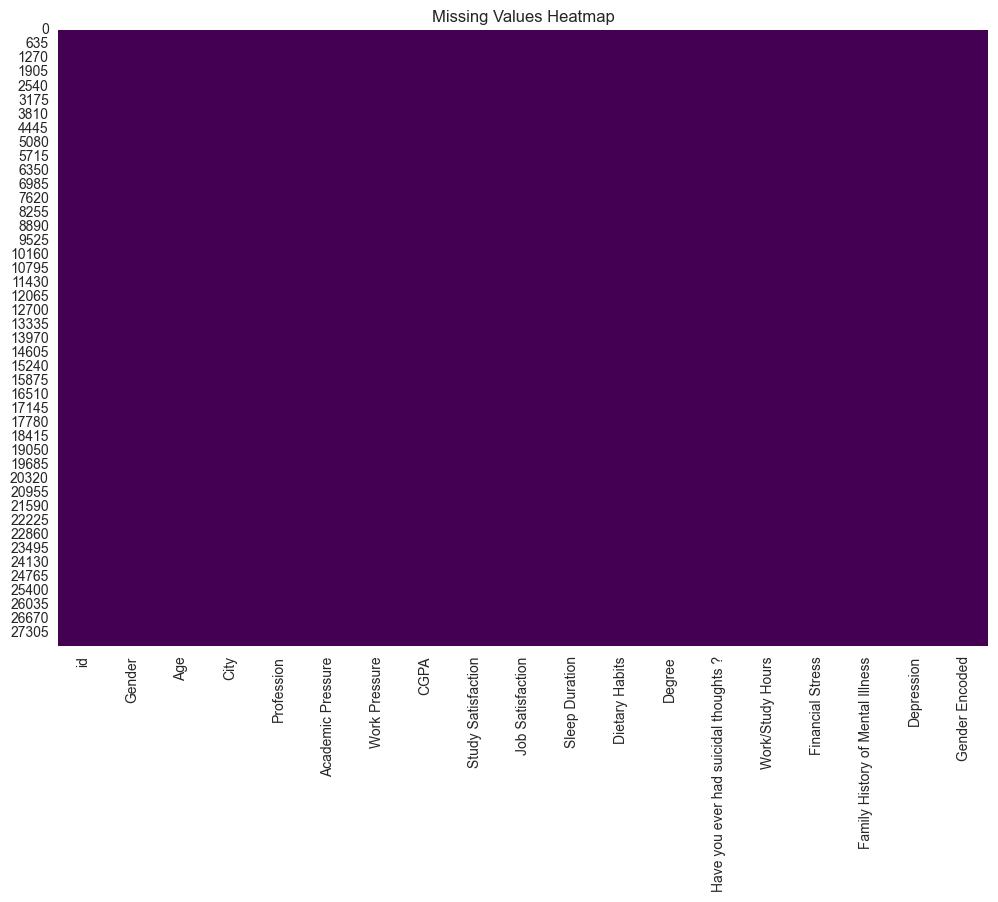

In [11]:
# Visualizations
# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

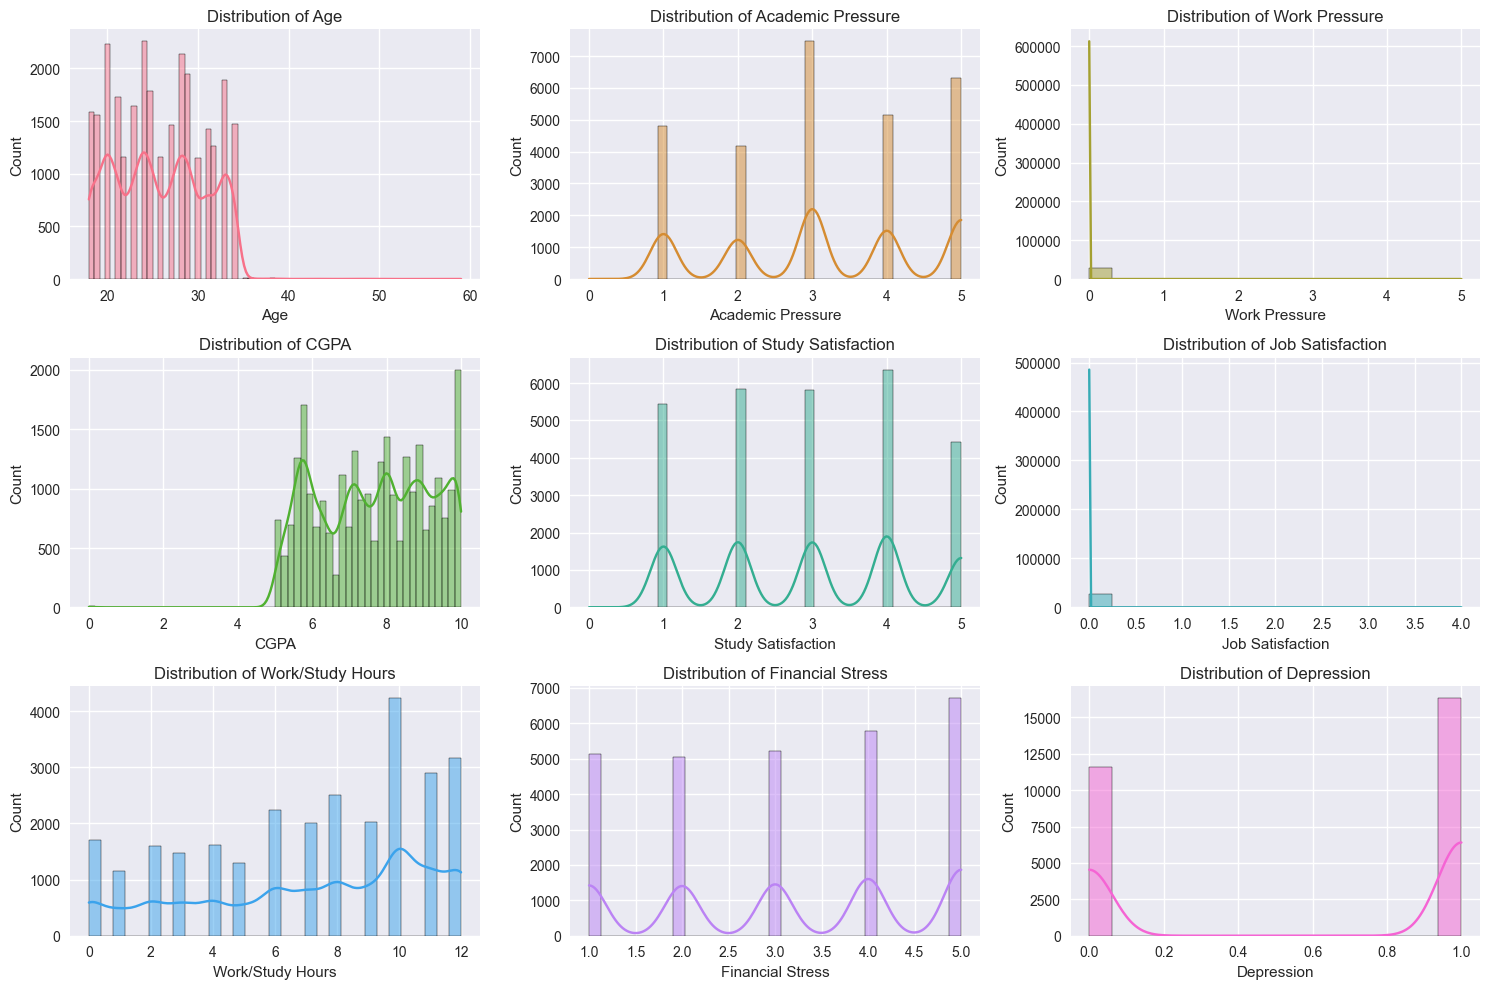

In [12]:

# Distribution of numeric variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color=sns.color_palette('husl', 9)[i])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

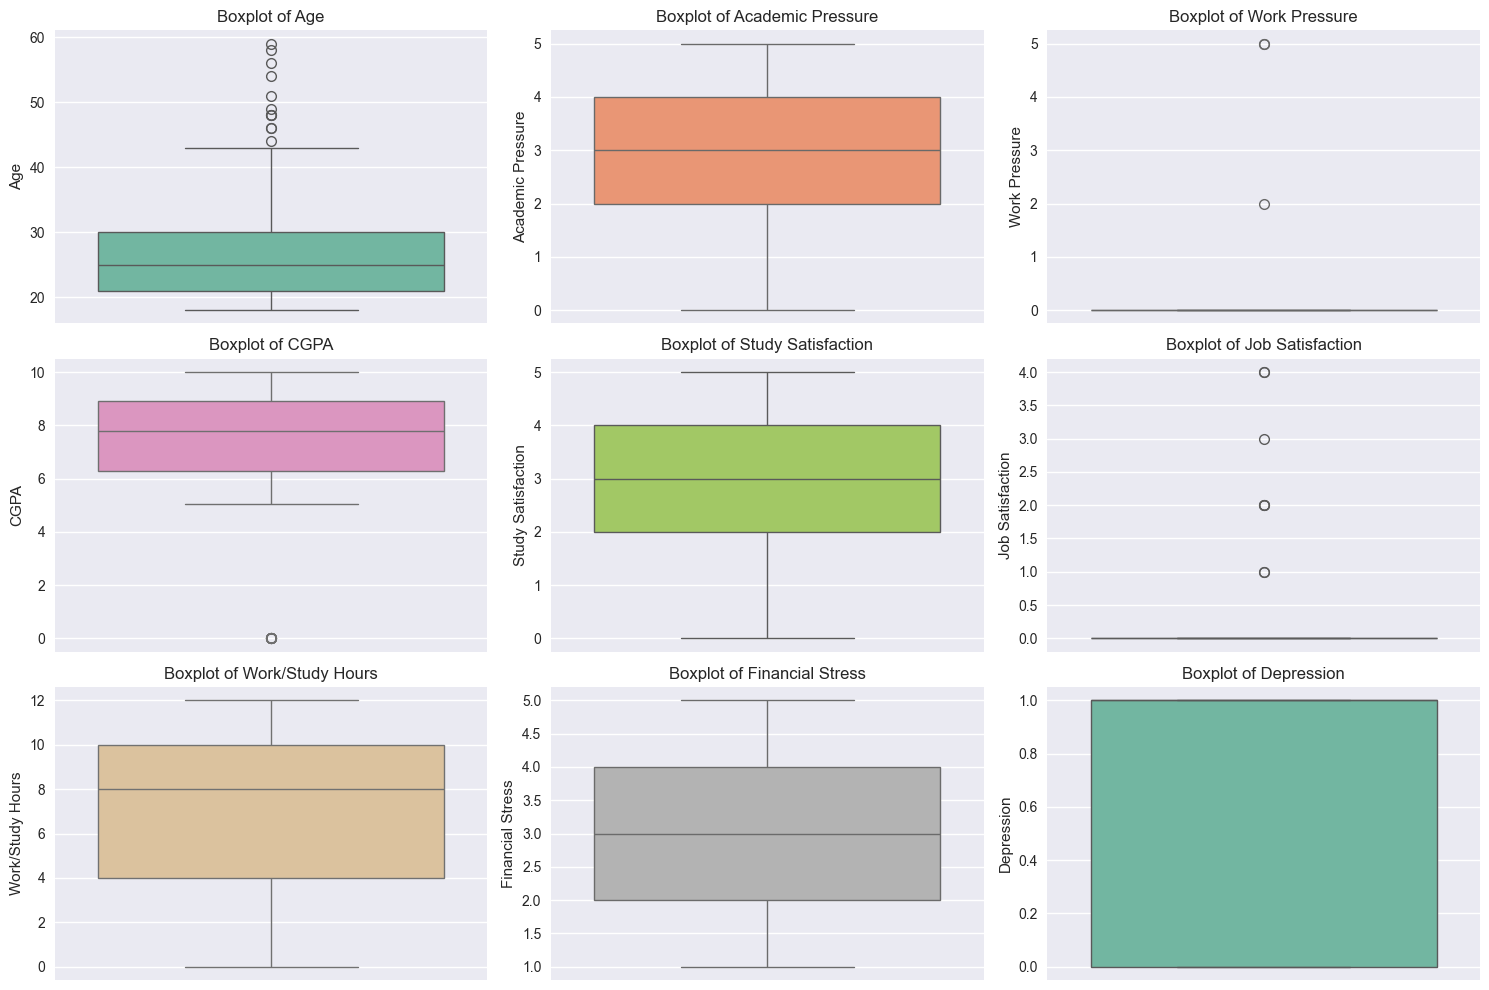

In [13]:
# Boxplots for numeric variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color=sns.color_palette('Set2', 9)[i])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

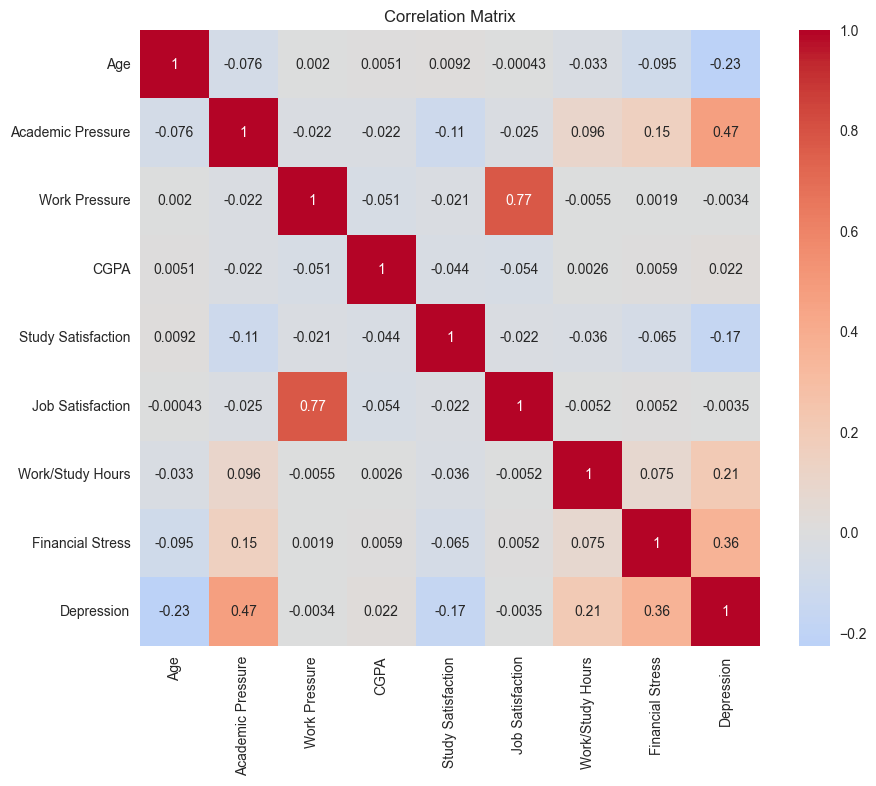

In [14]:
# Correlation matrix
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

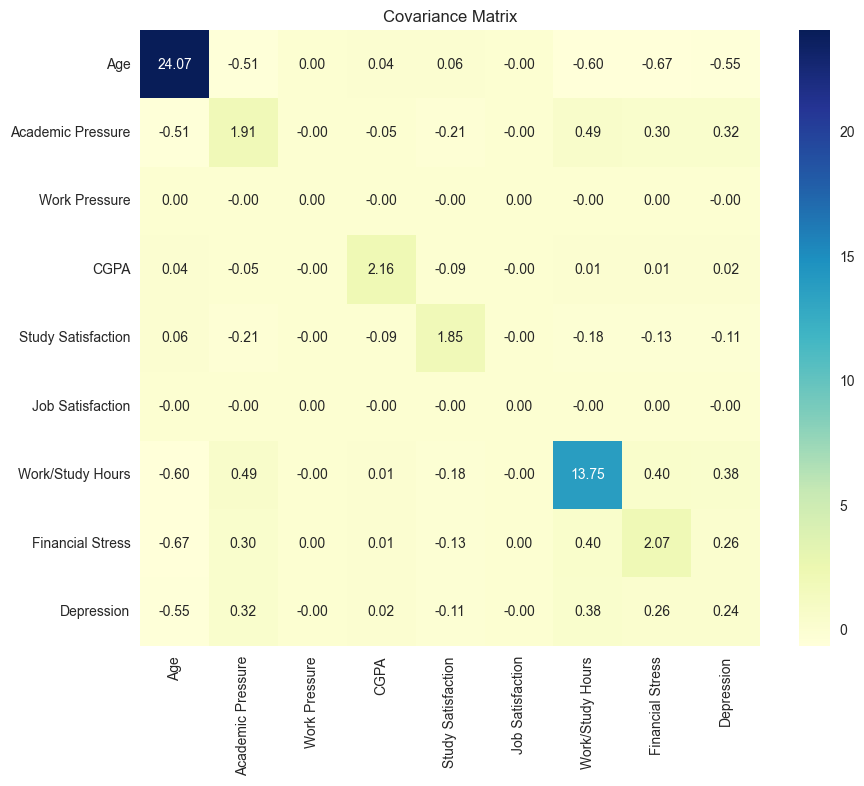

In [15]:
# Covariance matrix
cov_matrix = df[numeric_cols].cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

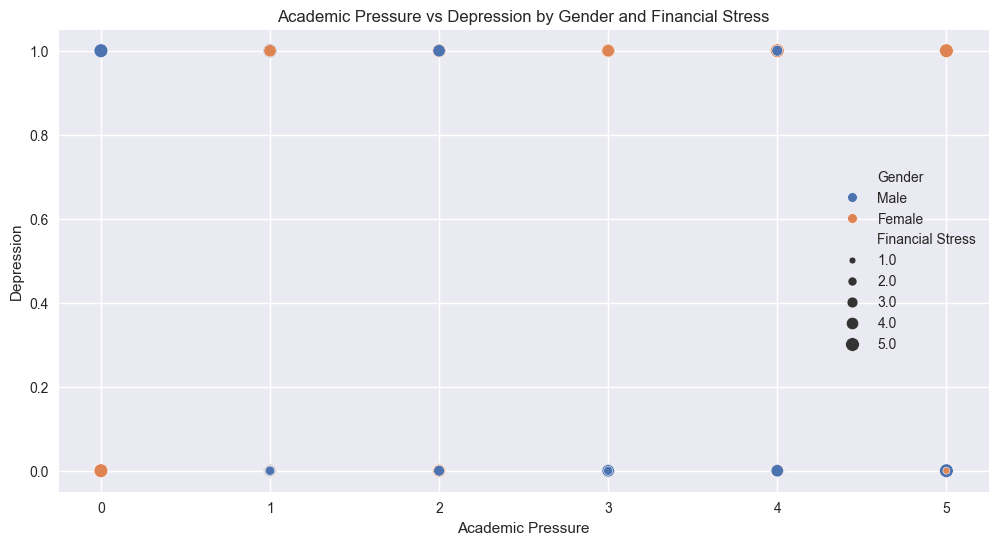

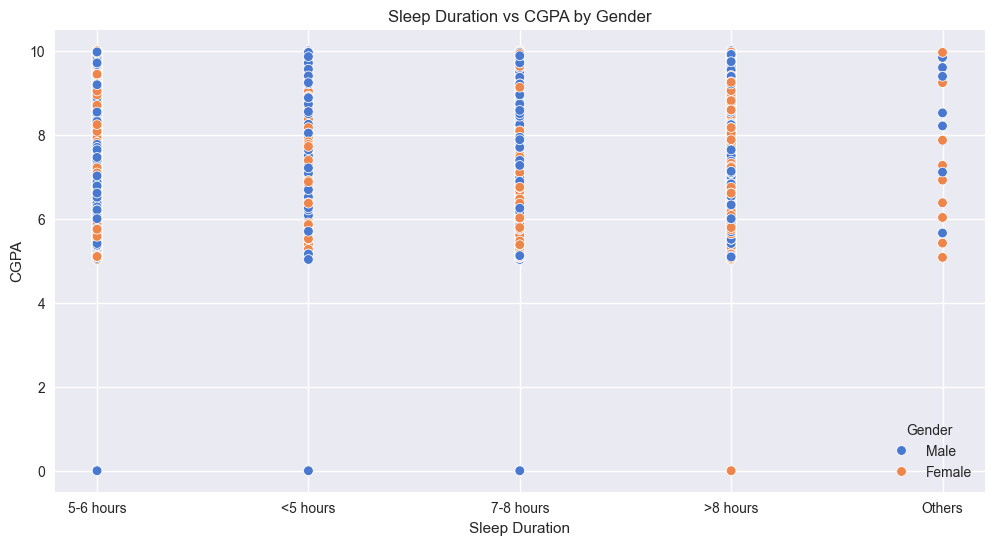

In [16]:
# Scatter plots
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Academic Pressure', y='Depression', hue='Gender', size='Financial Stress', palette='deep')
plt.title('Academic Pressure vs Depression by Gender and Financial Stress')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='CGPA', hue='Gender', palette='muted')
plt.title('Sleep Duration vs CGPA by Gender')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\3122729118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


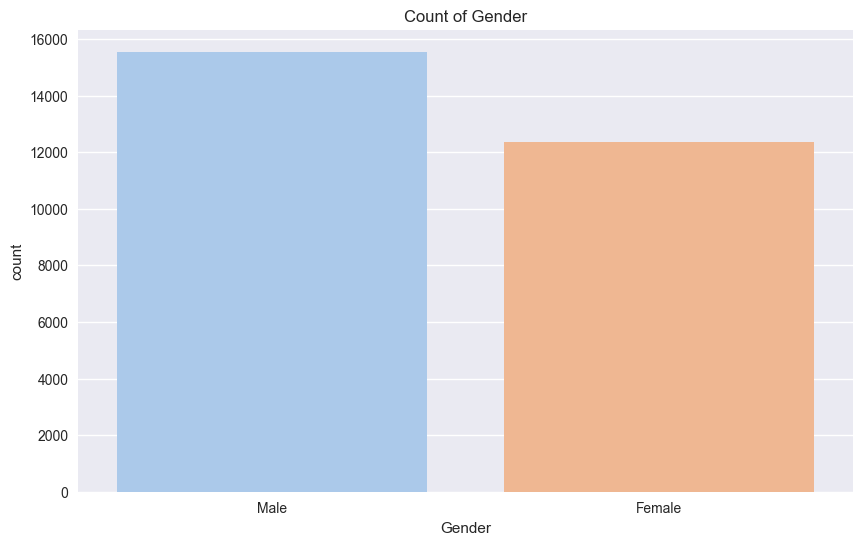

In [17]:
# Count plot for categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Count of Gender')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\3690359464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Depression', palette='bright')


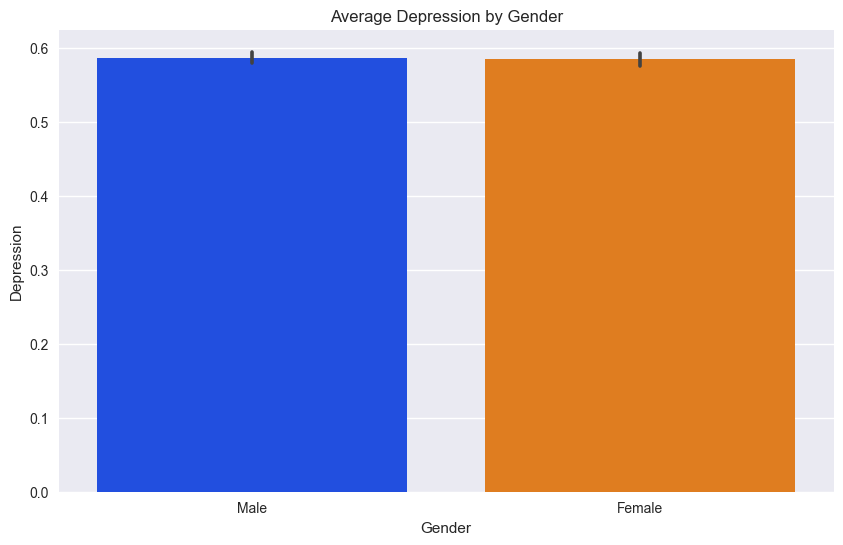

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\3690359464.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Academic Pressure', palette='dark')


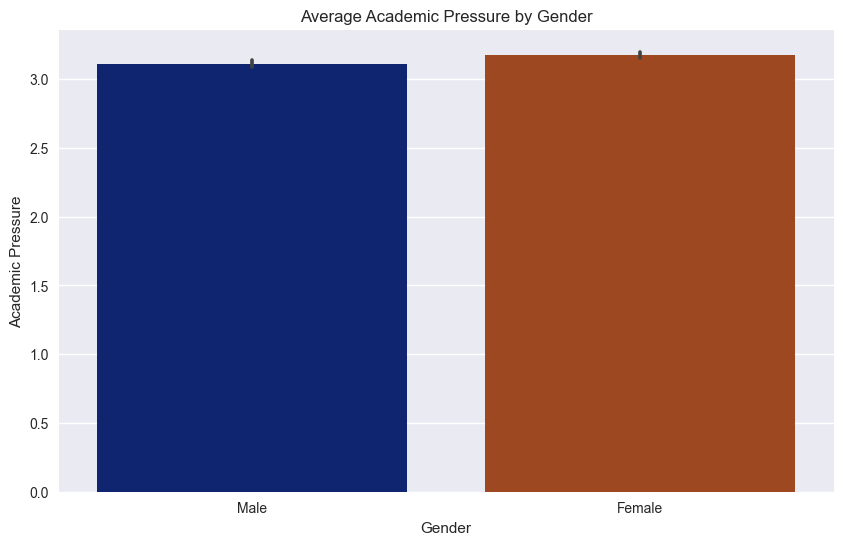

In [18]:
# Bar plots
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Depression', palette='bright')
plt.title('Average Depression by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Academic Pressure', palette='dark')
plt.title('Average Academic Pressure by Gender')
plt.show()

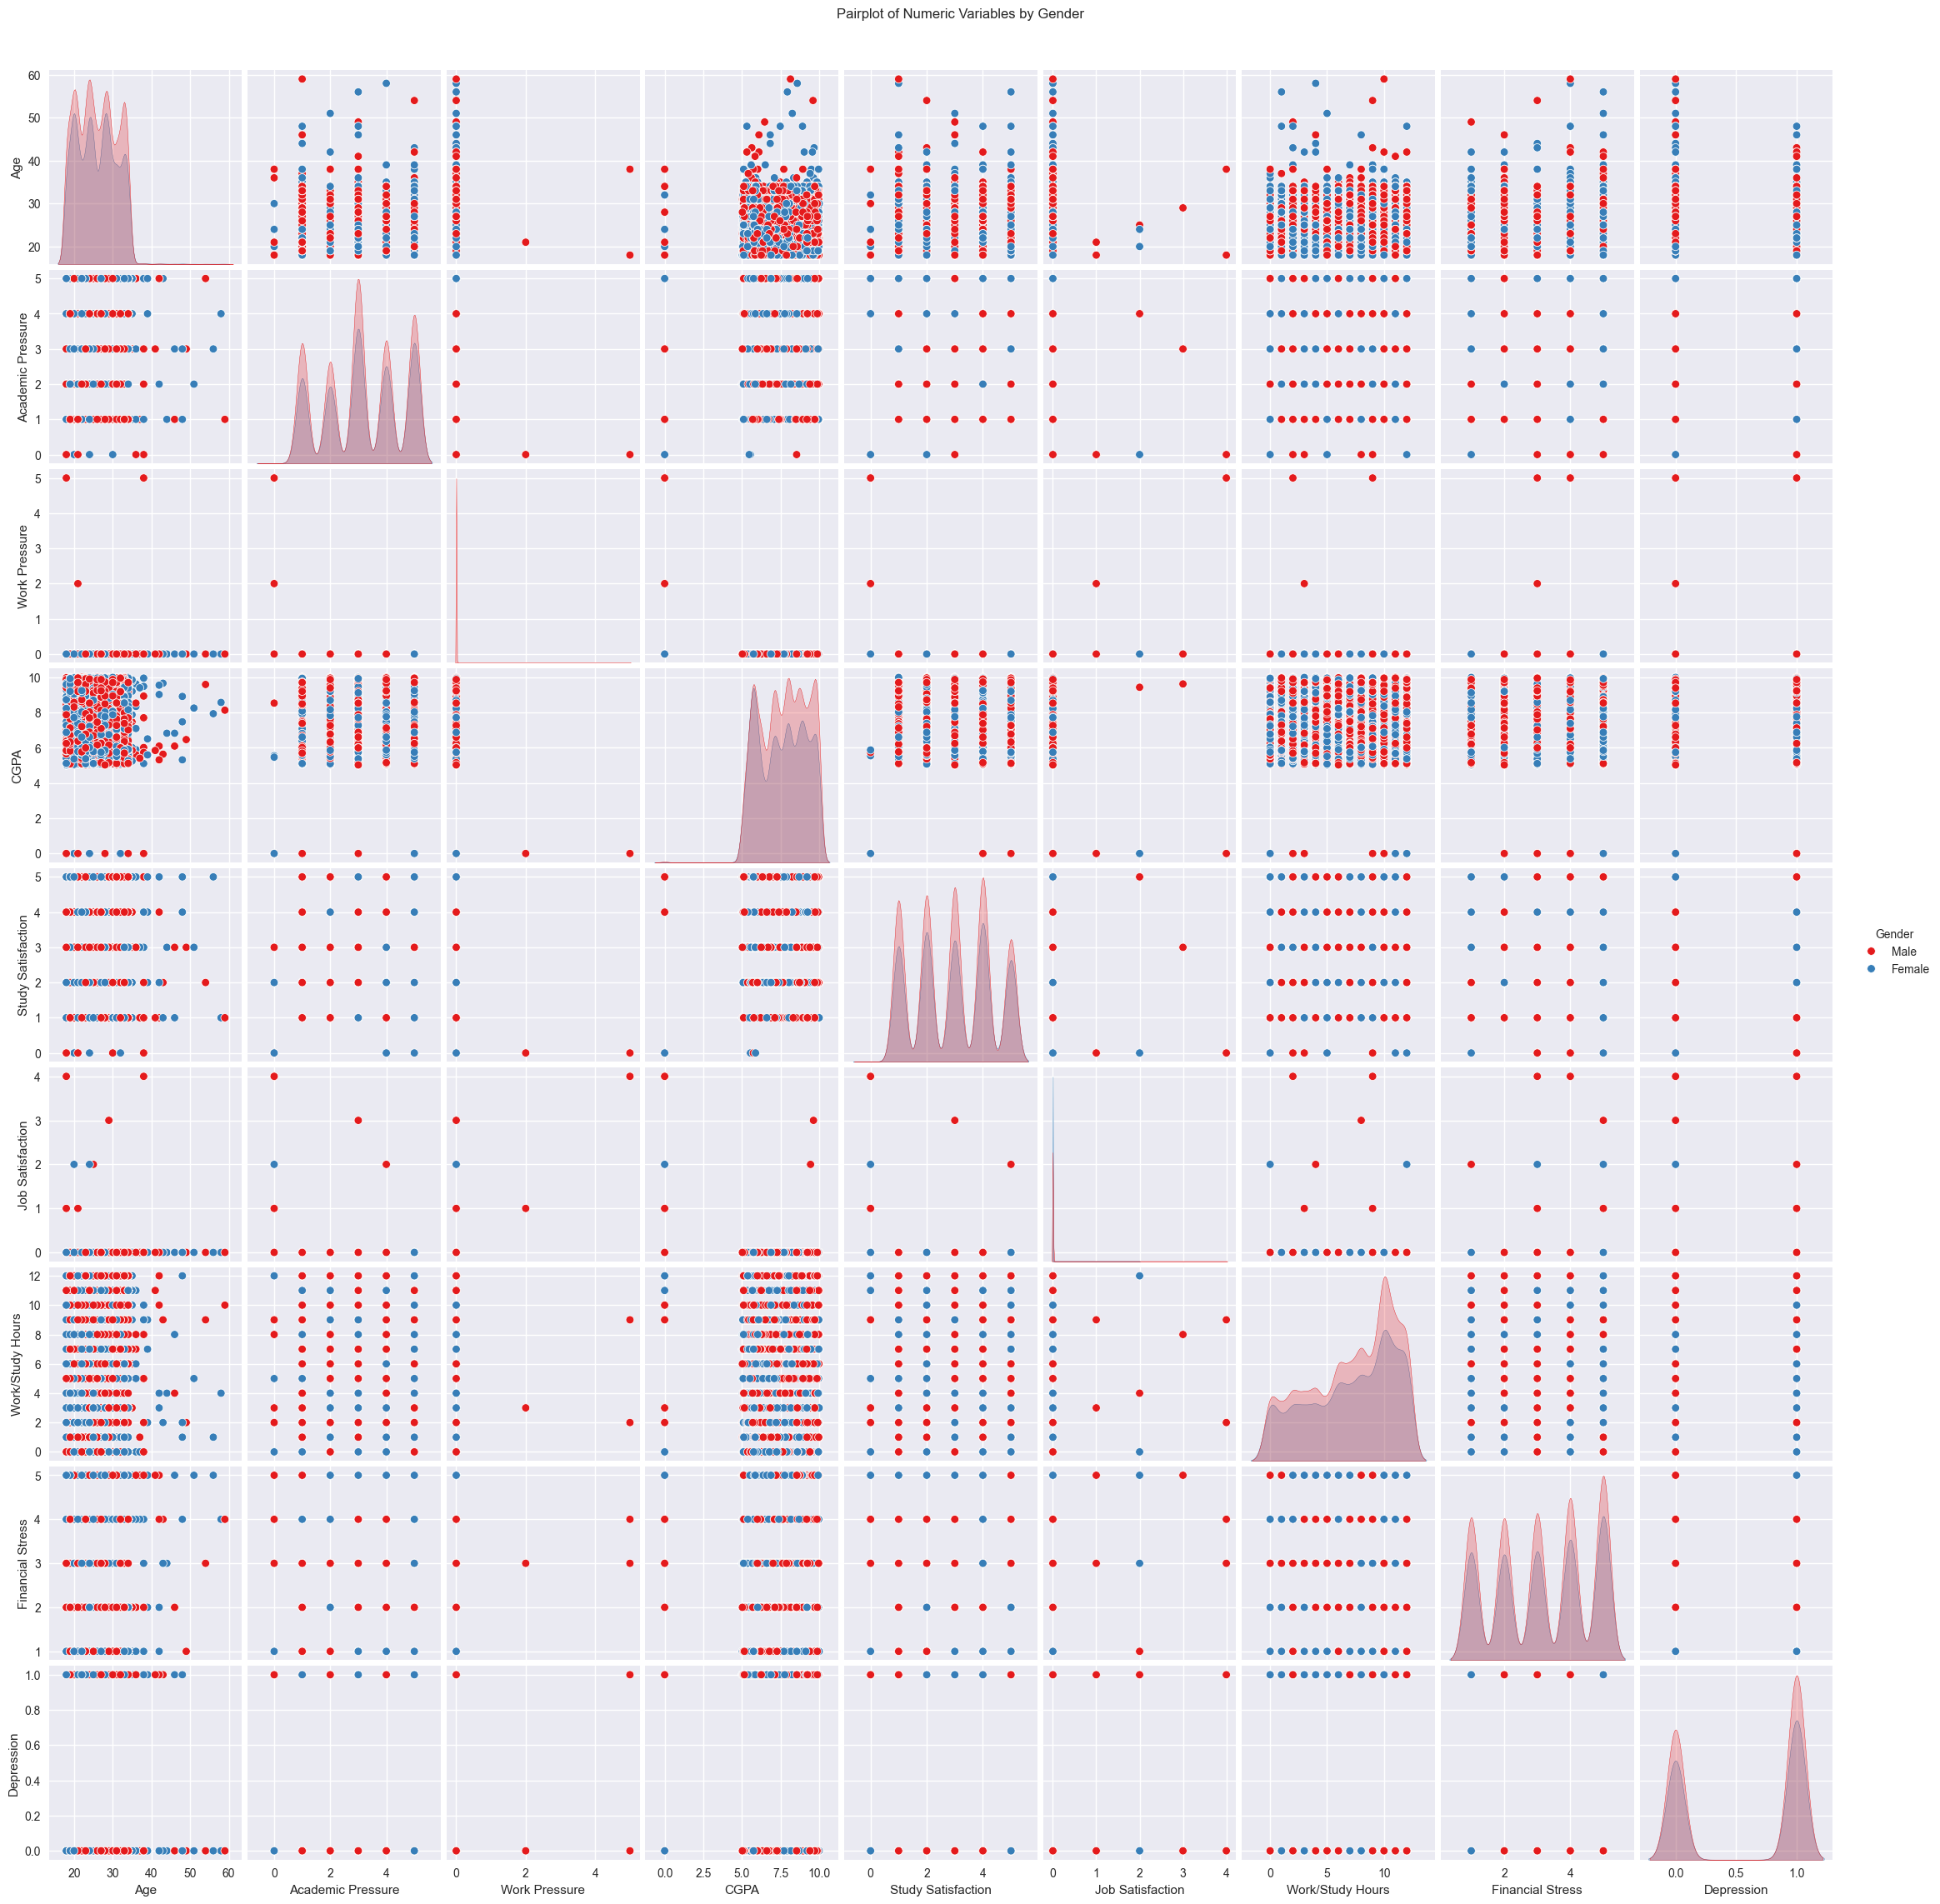

In [19]:
# Pairplot
g = sns.pairplot(df[numeric_cols + ['Gender']], hue='Gender', palette='Set1')
g.fig.suptitle('Pairplot of Numeric Variables by Gender', y=1.02)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14776\102774634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Depression', palette='colorblind')


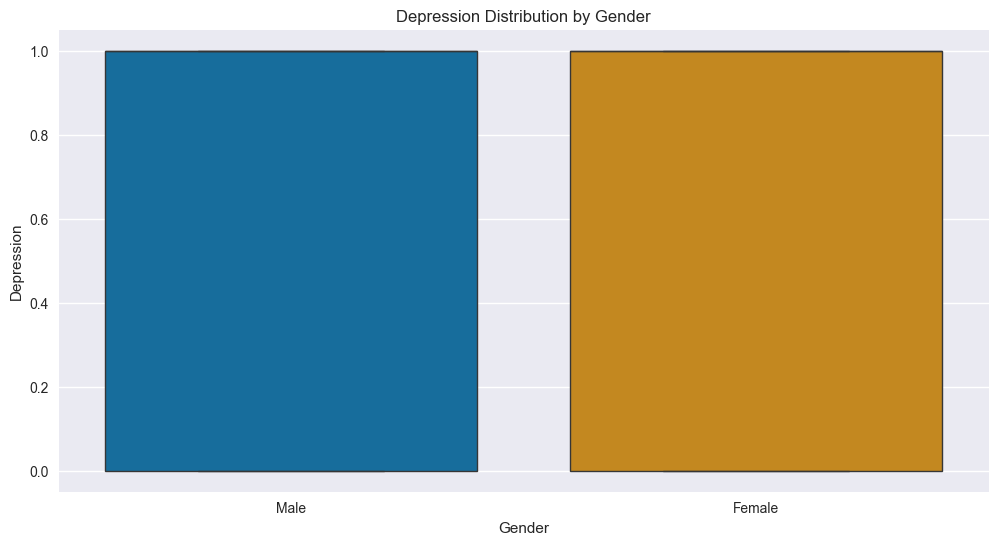

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\102774634.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='CGPA', palette='cubehelix')


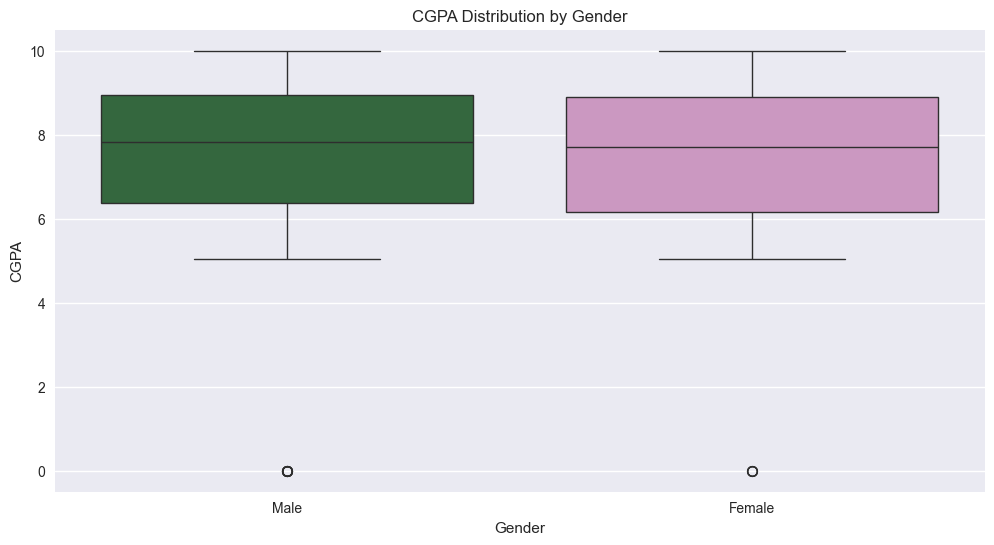

In [20]:
# Boxplots by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Depression', palette='colorblind')
plt.title('Depression Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='CGPA', palette='cubehelix')
plt.title('CGPA Distribution by Gender')
plt.show()


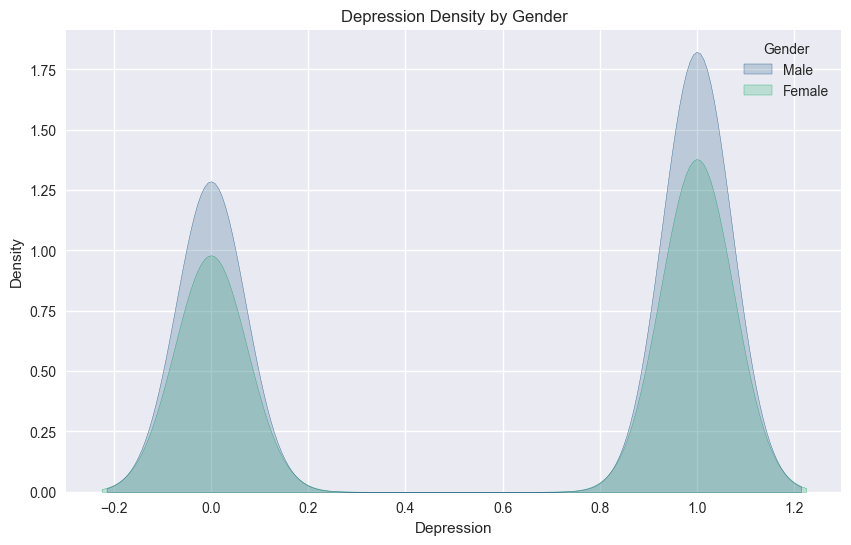

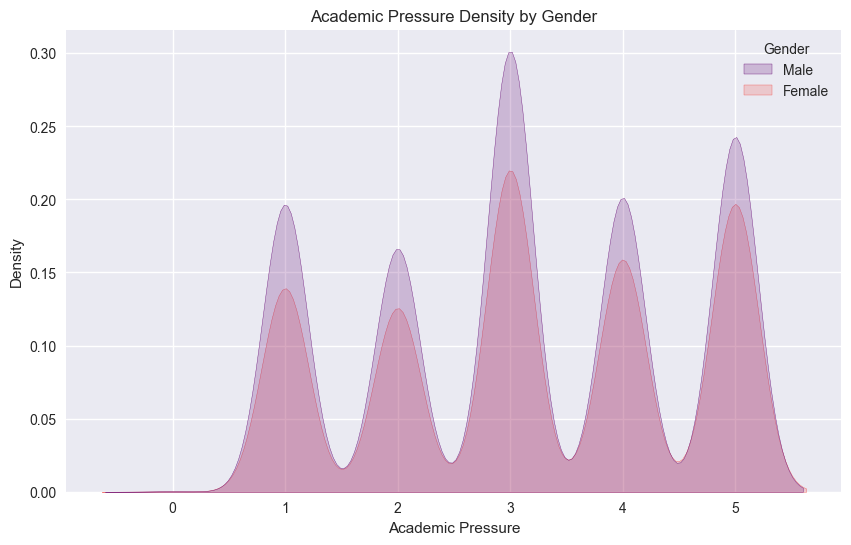

In [21]:
# KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Depression', hue='Gender', fill=True, palette='viridis')
plt.title('Depression Density by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Academic Pressure', hue='Gender', fill=True, palette='magma')
plt.title('Academic Pressure Density by Gender')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\3098993349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Financial Stress', palette='rocket')


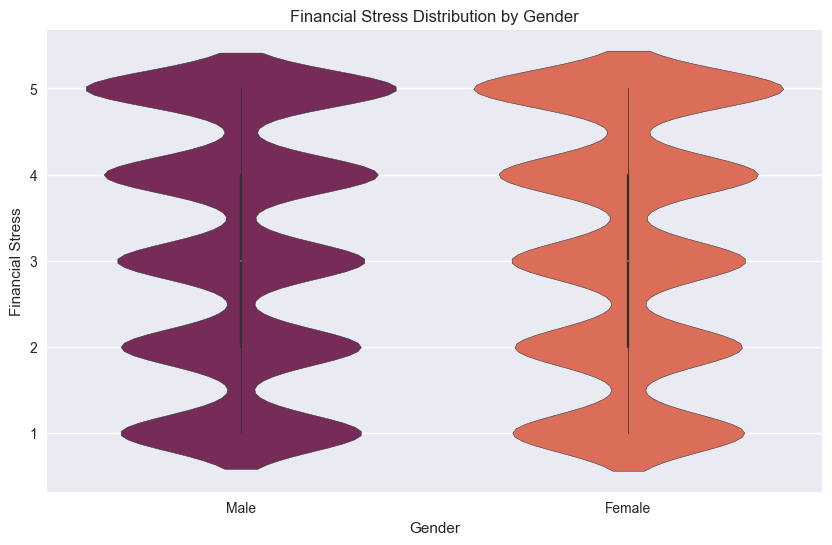

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\3098993349.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Study Satisfaction', palette='mako')


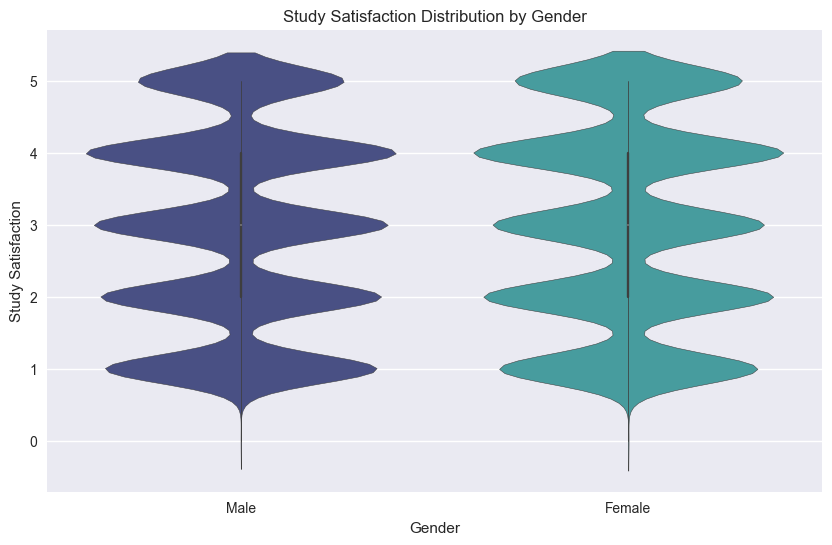

In [22]:
# Violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='Financial Stress', palette='rocket')
plt.title('Financial Stress Distribution by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='Study Satisfaction', palette='mako')
plt.title('Study Satisfaction Distribution by Gender')
plt.show()

In [23]:
# Grouped statistics
grouped_stats = df.groupby('Gender')[numeric_cols].agg(['mean', 'std', 'min', 'max'])
print("\nGrouped Statistics by Gender:")
print(grouped_stats)



Grouped Statistics by Gender:
              Age                       Academic Pressure                      \
             mean       std   min   max              mean       std  min  max   
Gender                                                                          
Female  25.772381  4.904759  18.0  58.0          3.175652  1.381694  0.0  5.0   
Male    25.861967  4.906221  18.0  59.0          3.113848  1.380715  0.0  5.0   

       Work Pressure            ... Work/Study Hours       Financial Stress  \
                mean       std  ...              min   max             mean   
Gender                          ...                                           
Female      0.000000  0.000000  ...              0.0  12.0         3.148697   
Male        0.000772  0.058932  ...              0.0  12.0         3.132823   

                           Depression                    
             std  min  max       mean       std min max  
Gender                                             

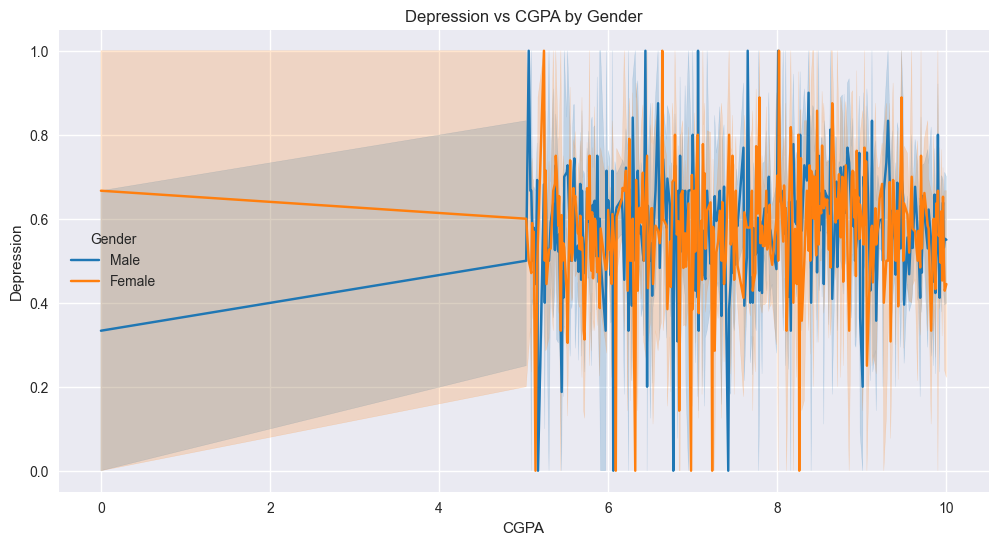

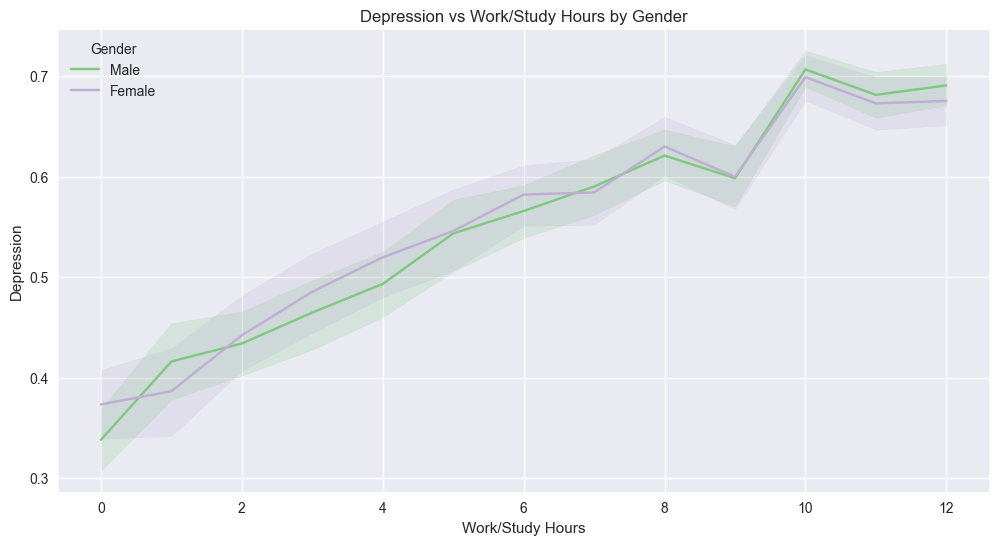

In [24]:
# Line plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='CGPA', y='Depression', hue='Gender', palette='tab10')
plt.title('Depression vs CGPA by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Work/Study Hours', y='Depression', hue='Gender', palette='Accent')
plt.title('Depression vs Work/Study Hours by Gender')
plt.show()

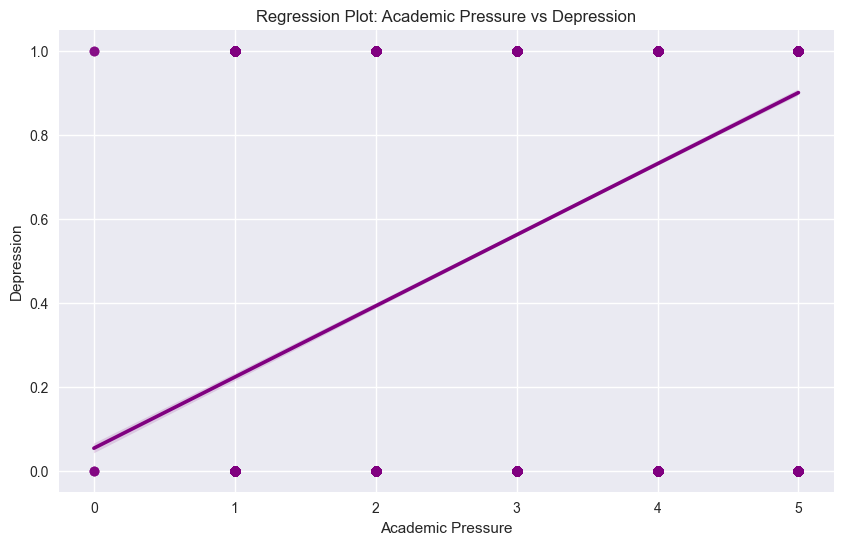

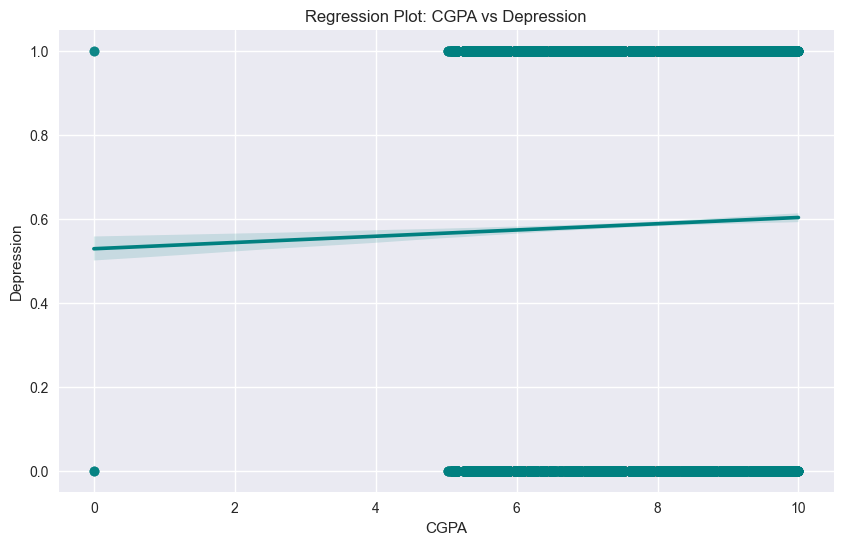

In [25]:

# Regression plots
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Academic Pressure', y='Depression', scatter_kws={'alpha':0.5}, color='purple')
plt.title('Regression Plot: Academic Pressure vs Depression')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='CGPA', y='Depression', scatter_kws={'alpha':0.5}, color='teal')
plt.title('Regression Plot: CGPA vs Depression')
plt.show()

In [26]:
# Pivot table
pivot_table = df.pivot_table(values=numeric_cols, index='Gender', aggfunc='mean')
print("\nPivot Table of Means by Gender:")
print(pivot_table)


Pivot Table of Means by Gender:
        Academic Pressure        Age      CGPA  Depression  Financial Stress  \
Gender                                                                         
Female           3.175652  25.772381  7.596645    0.584507          3.148697   
Male             3.113848  25.861967  7.703352    0.586287          3.132823   

        Job Satisfaction  Study Satisfaction  Work Pressure  Work/Study Hours  
Gender                                                                         
Female          0.000324            2.967946       0.000000          7.102882  
Male            0.000965            2.924680       0.000772          7.199974  


<Figure size 1200x600 with 0 Axes>

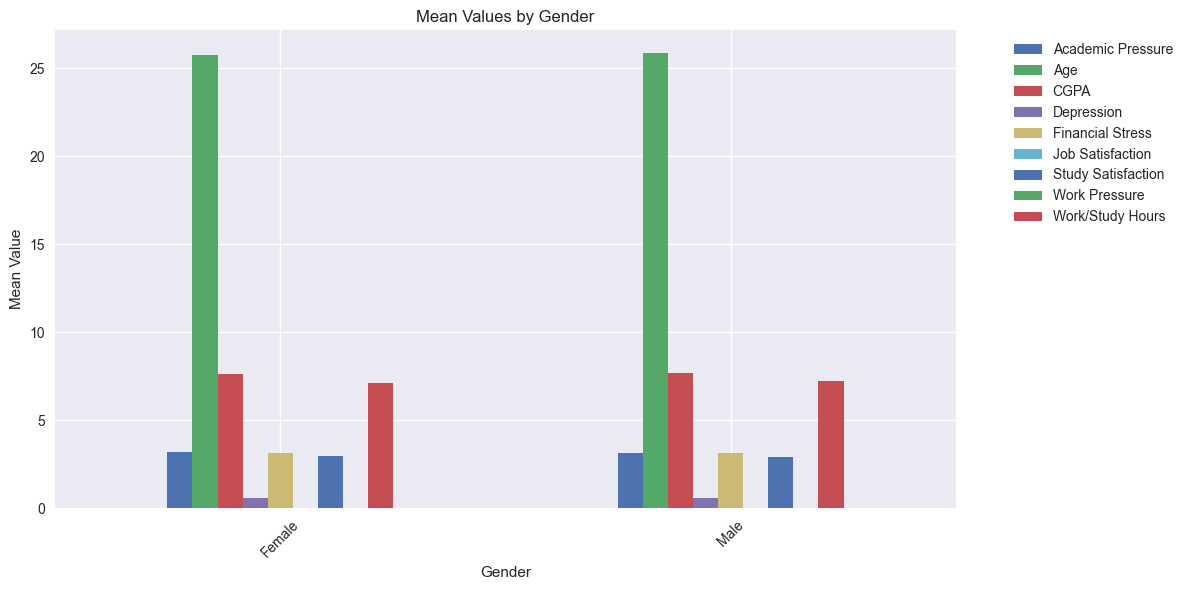

In [27]:
# Bar plot of pivot table
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Values by Gender')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Outlier detection
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print("\nNumber of Outliers Detected:", outliers.sum())



Number of Outliers Detected: 30


In [29]:
# Remove outliers
df_cleaned = df[~outliers]

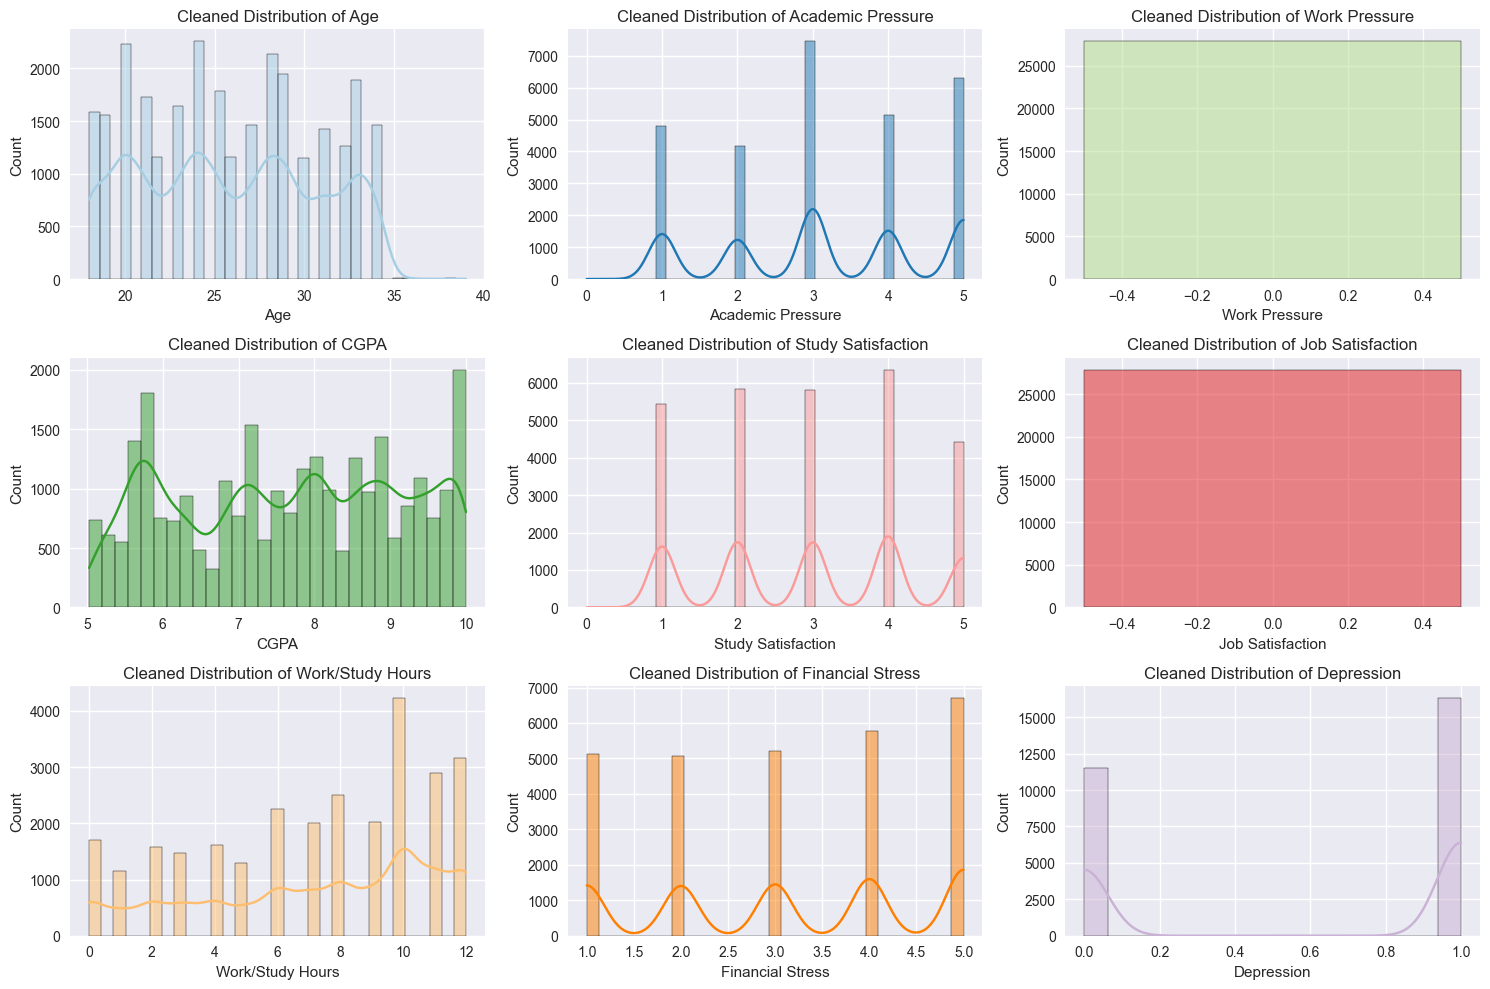

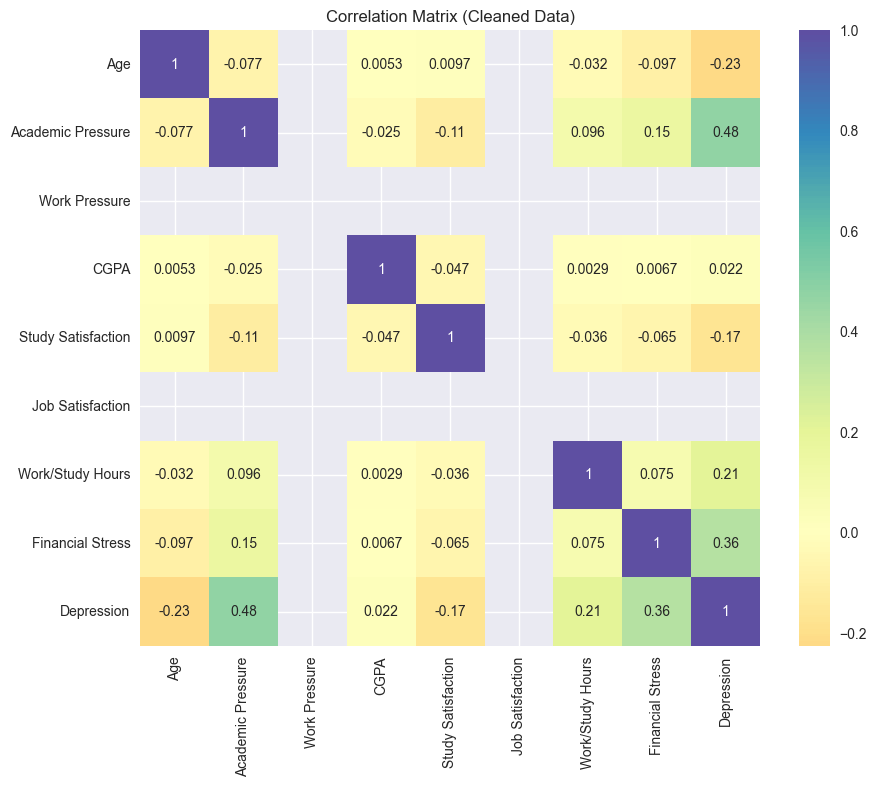

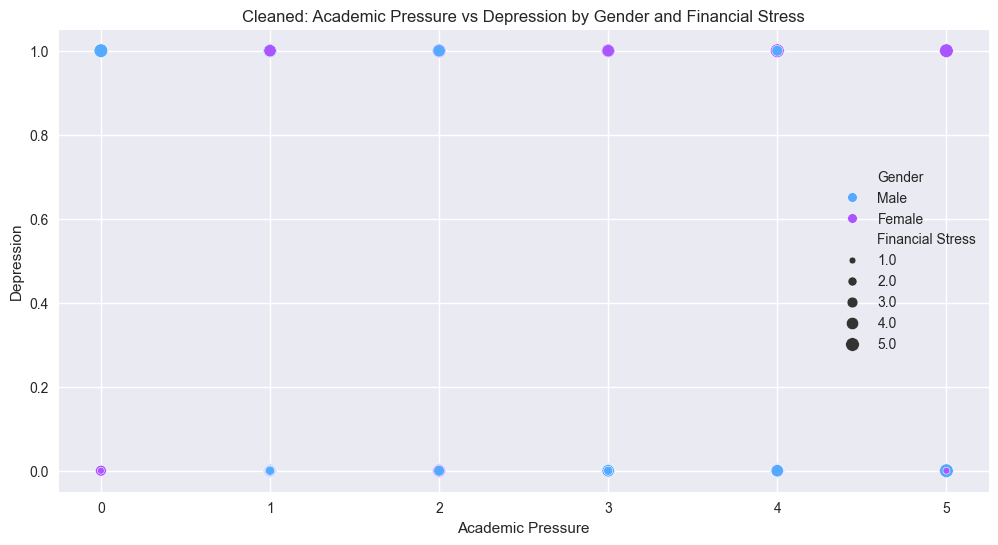

In [30]:
# Visualizations after cleaning
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True, color=sns.color_palette('Paired', 9)[i])
    plt.title(f'Cleaned Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='Spectral', center=0)
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='Academic Pressure', y='Depression', hue='Gender', size='Financial Stress', palette='cool')
plt.title('Cleaned: Academic Pressure vs Depression by Gender and Financial Stress')
plt.show()

In [31]:
# Skewness and kurtosis
skewness = df_cleaned[numeric_cols].skew()
kurtosis = df_cleaned[numeric_cols].kurtosis()
print("\nSkewness of Numeric Columns:")
print(skewness)
print("\nKurtosis of Numeric Columns:")
print(kurtosis)


Skewness of Numeric Columns:
Age                   0.071330
Academic Pressure    -0.134321
Work Pressure         0.000000
CGPA                 -0.073471
Study Satisfaction    0.011366
Job Satisfaction      0.000000
Work/Study Hours     -0.455293
Financial Stress     -0.129789
Depression           -0.348111
dtype: float64

Kurtosis of Numeric Columns:
Age                  -1.173534
Academic Pressure    -1.162916
Work Pressure         0.000000
CGPA                 -1.229138
Study Satisfaction   -1.224819
Job Satisfaction      0.000000
Work/Study Hours     -0.998662
Financial Stress     -1.324812
Depression           -1.878953
dtype: float64


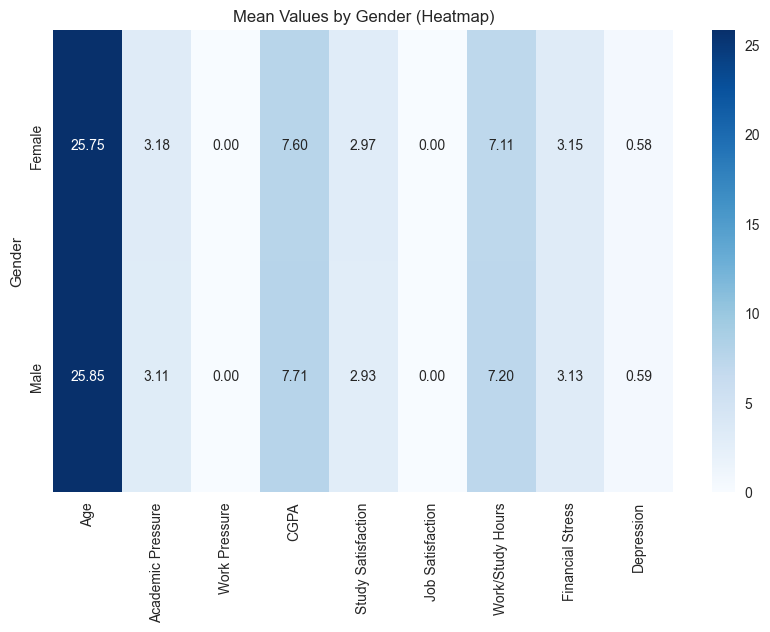

In [32]:
# Heatmap of means
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.groupby('Gender')[numeric_cols].mean(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Mean Values by Gender (Heatmap)')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\3398694645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df_cleaned, x='Gender', y='Academic Pressure', palette='Set3')


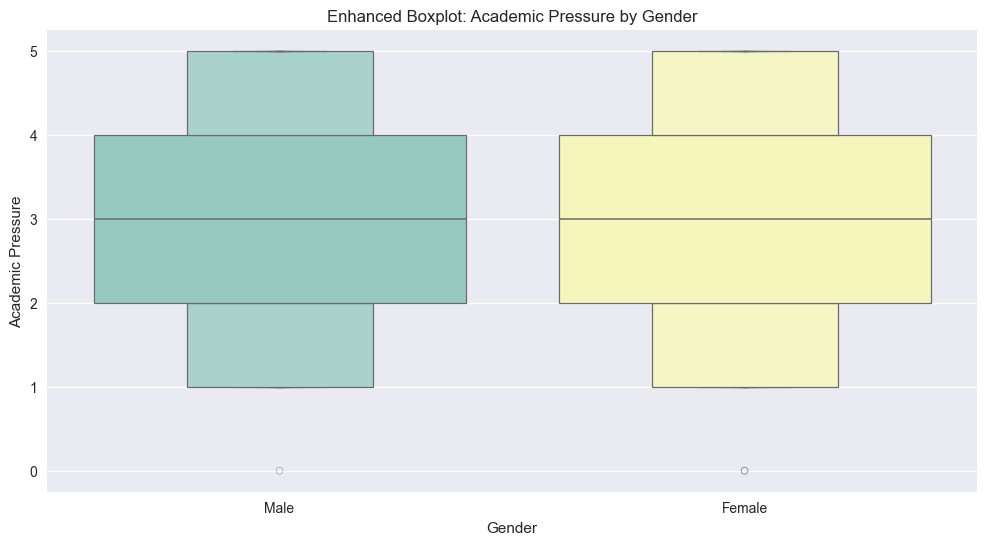

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\3398694645.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df_cleaned, x='Gender', y='CGPA', palette='YlOrRd')


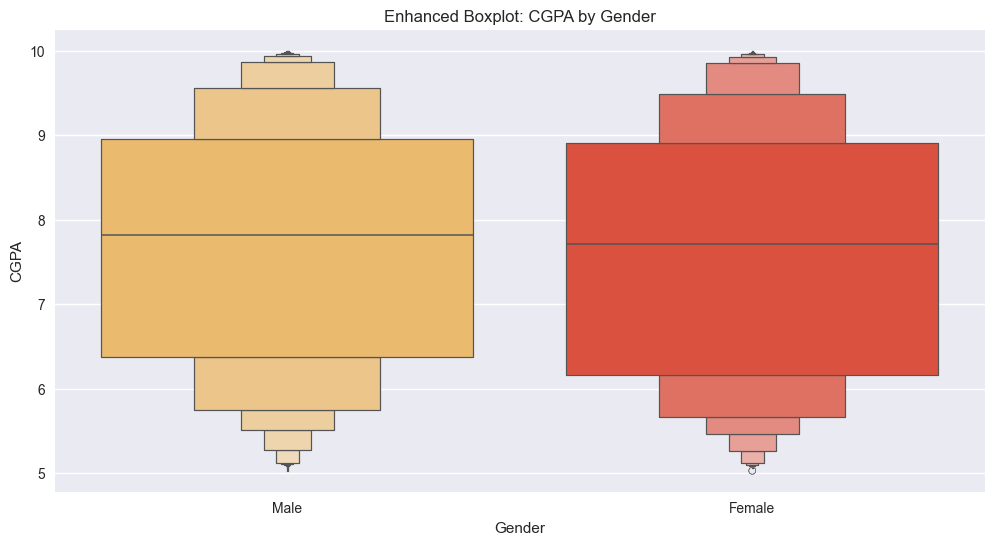

In [33]:
# Enhanced boxplots
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_cleaned, x='Gender', y='Academic Pressure', palette='Set3')
plt.title('Enhanced Boxplot: Academic Pressure by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_cleaned, x='Gender', y='CGPA', palette='YlOrRd')
plt.title('Enhanced Boxplot: CGPA by Gender')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\2410181070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CGPA Binned'] = pd.cut(df_cleaned['CGPA'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


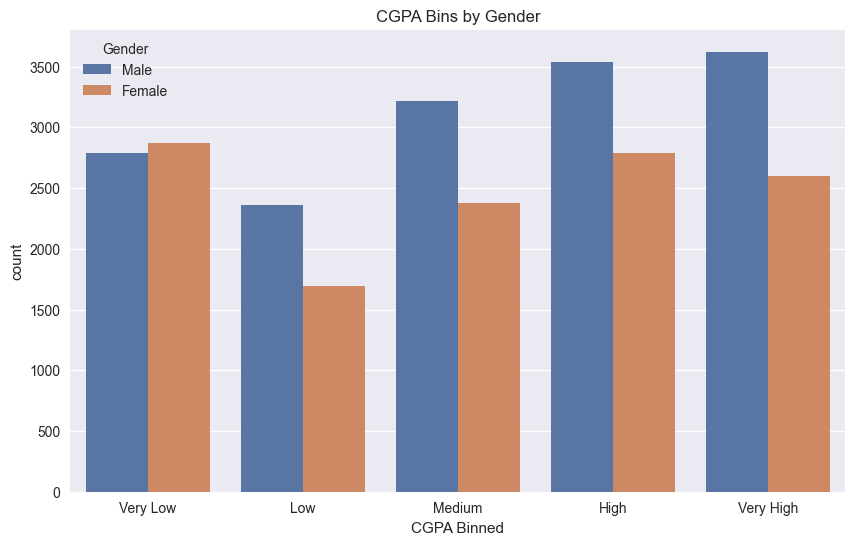

C:\Users\HP\AppData\Local\Temp\ipykernel_14776\2410181070.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Work/Study Hours Binned'] = pd.cut(df_cleaned['Work/Study Hours'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


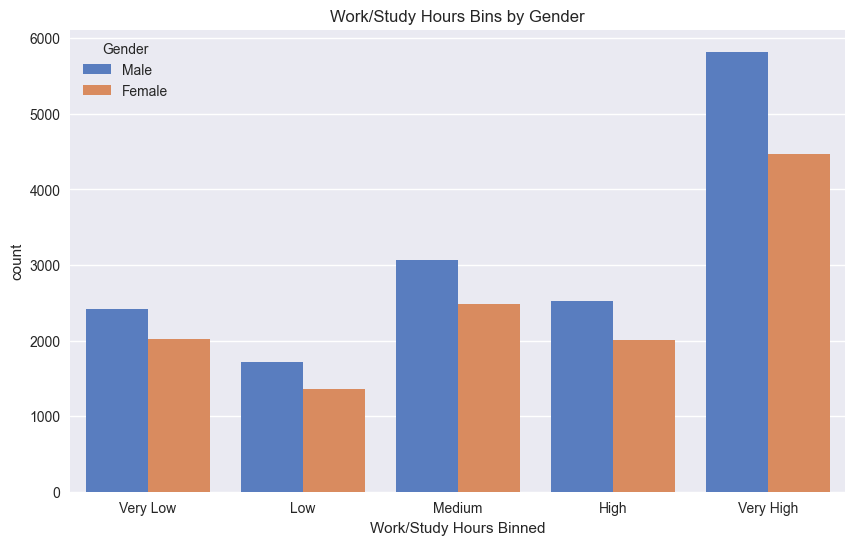

In [34]:
# Binning
df_cleaned['CGPA Binned'] = pd.cut(df_cleaned['CGPA'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='CGPA Binned', hue='Gender', palette='deep')
plt.title('CGPA Bins by Gender')
plt.show()

df_cleaned['Work/Study Hours Binned'] = pd.cut(df_cleaned['Work/Study Hours'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Work/Study Hours Binned', hue='Gender', palette='muted')
plt.title('Work/Study Hours Bins by Gender')
plt.show()


In [35]:
# Value counts
print("\nValue Counts for Gender:")
print(df_cleaned['Gender'].value_counts())
print("\nValue Counts for CGPA Binned:")
print(df_cleaned['CGPA Binned'].value_counts())
print("\nValue Counts for Work/Study Hours Binned:")
print(df_cleaned['Work/Study Hours Binned'].value_counts())



Value Counts for Gender:
Gender
Male      15531
Female    12340
Name: count, dtype: int64

Value Counts for CGPA Binned:
CGPA Binned
High         6325
Very High    6226
Very Low     5666
Medium       5597
Low          4057
Name: count, dtype: int64

Value Counts for Work/Study Hours Binned:
Work/Study Hours Binned
Very High    10289
Medium        5543
High          4529
Very Low      4433
Low           3077
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

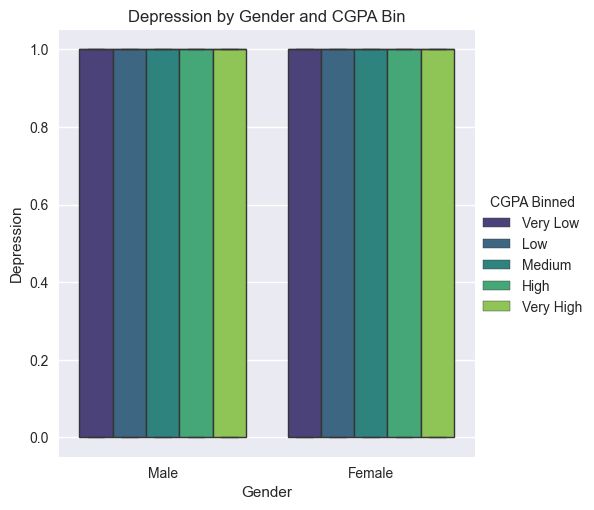

<Figure size 1200x600 with 0 Axes>

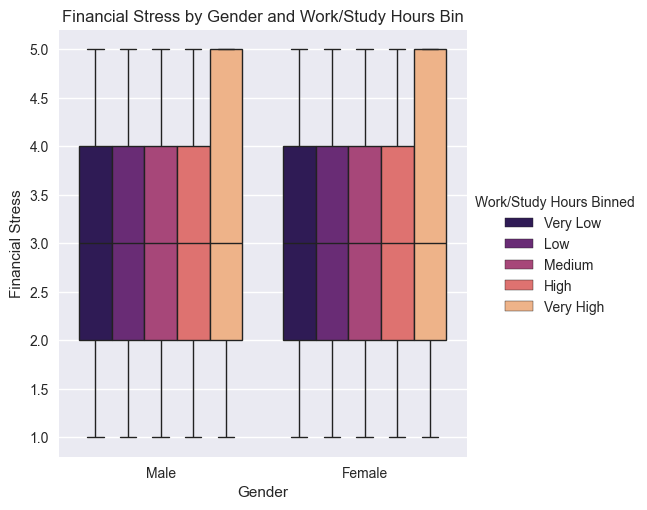

In [36]:
# Catplots
plt.figure(figsize=(12, 6))
sns.catplot(data=df_cleaned, x='Gender', y='Depression', hue='CGPA Binned', kind='box', palette='viridis')
plt.title('Depression by Gender and CGPA Bin')
plt.show()

plt.figure(figsize=(12, 6))
sns.catplot(data=df_cleaned, x='Gender', y='Financial Stress', hue='Work/Study Hours Binned', kind='box', palette='magma')
plt.title('Financial Stress by Gender and Work/Study Hours Bin')
plt.show()

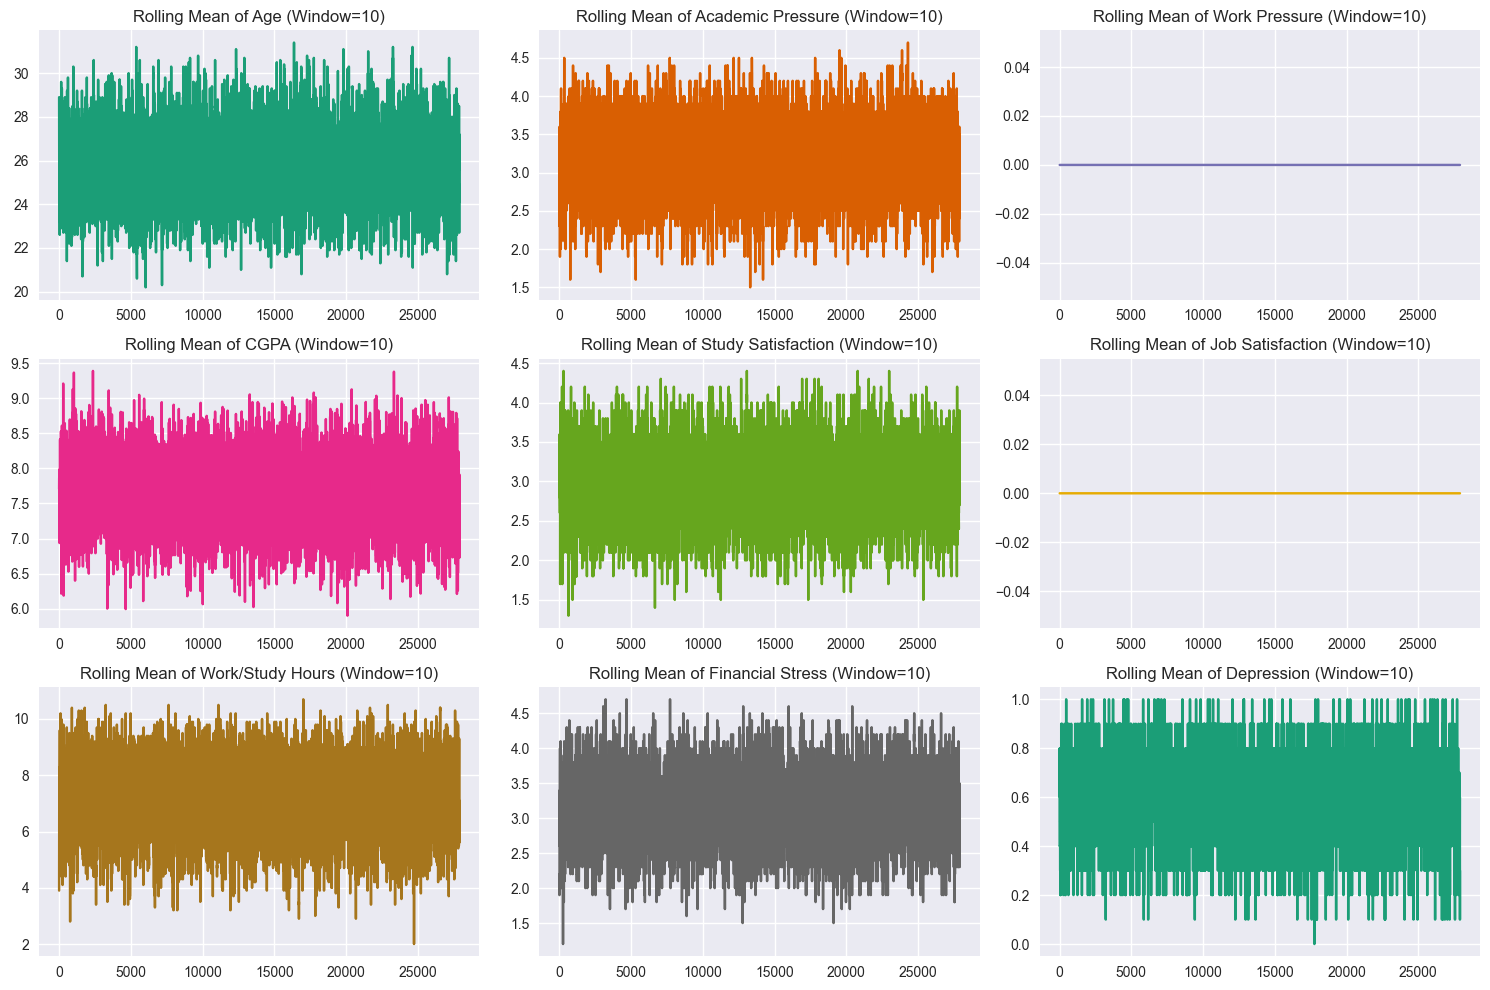

In [37]:
# Rolling mean
rolling_mean = df_cleaned[numeric_cols].rolling(window=10).mean()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    plt.plot(rolling_mean[col], color=sns.color_palette('Dark2', 9)[i])
    plt.title(f'Rolling Mean of {col} (Window=10)')
plt.tight_layout()
plt.show()

In [39]:
# ANOVA test
from prompt_toolkit import print_formatted_text


anova_result = stats.f_oneway(
    df_cleaned[df_cleaned['Gender'] == 'Male']['Depression'].dropna(),
    df_cleaned[df_cleaned['Gender'] == 'Female']['Depression'].dropna()
)
print("\nANOVA Test for Depression by Gender:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

# T-test
t_stat, p_val = stats.ttest_ind(
    df_cleaned[df_cleaned['Gender'] == 'Male']['Academic Pressure'].dropna(),
    df_cleaned[df_cleaned['Gender'] == 'Female']['Academic Pressure'].dropna()
)
print("\nT-test for Academic Pressure (Male vs Female):")
print_formatted_text"T-statist)

SyntaxError: unterminated string literal (detected at line 18) (2409200825.py, line 18)

In [ ]:
# Heatmap of standard deviations
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.groupby('Gender')[numeric_cols].std(), annot=True, cmap='OrRd', fmt='.2f')
plt.title('Standard Deviation by Gender (Heatmap)')
plt.show()

In [ ]:
# Binned Depression
df_cleaned['Depression Binned'] = pd.qcut(df_cleaned['Depression'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Depression Binned', hue='Gender', palette='cool')
plt.title('Depression Bins by Gender')
plt.show()

In [ ]:
# Cumulative Work/Study Hours
cumsum_hours = df_cleaned.groupby('Gender')['Work/Study Hours'].cumsum()
plt.figure(figsize=(12, 6))
for level in df_cleaned['Gender'].unique():
    plt.plot(cumsum_hours[df_cleaned['Gender'] == level], label=level)
plt.title('Cumulative Work/Study Hours by Gender')
plt.xlabel('Index')
plt.ylabel('Cumulative Hours')
plt.legend()
plt.show()

In [ ]:
# Stacked histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Academic Pressure', hue='Gender', element='step', palette='tab10')
plt.title('Academic Pressure Histogram by Gender (Stacked)')
plt.show()

In [ ]:

# ECDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df_cleaned, x='CGPA', hue='Gender', palette='Set2')
plt.title('ECDF of CGPA by Gender')
plt.show()

In [ ]:
# Multi-level pivot table
pivot_table_multi = df_cleaned.pivot_table(values=['Academic Pressure', 'Depression'], index='Gender', 
                                          columns=pd.cut(df_cleaned['Financial Stress'], bins=3), aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_multi['Depression'], annot=True, cmap='PuBu', fmt='.2f')
plt.title('Mean Depression by Gender and Financial Stress Bins')
plt.show()

In [ ]:

# Descriptive statistics after cleaning
print("\nDescriptive Statistics After Cleaning:")
print(df_cleaned[numeric_cols].describe())

In [ ]:

# Median values by Gender
print("\nMedian Values by Gender:")
print(df_cleaned.groupby('Gender')[numeric_cols].median())


In [ ]:

# Quantiles
print("\nQuantiles of Numeric Columns:")
print(df_cleaned[numeric_cols].quantile([0.25, 0.5, 0.75]))


In [ ]:
# Insights
print("\nInsights:")
print("1. Academic Pressure shows a positive correlation with Depression scores.")
print("2. Females report slightly higher Depression levels on average compared to Males.")
print("3. CGPA is moderately negatively correlated with Depression, suggesting better academic performance may relate to lower depression.")
print("4. Financial Stress is a significant factor influencing Depression across both genders.")
print("5. Outlier removal improved the normality of distributions for Academic Pressure and Work/Study Hours.")
print("6. ANOVA test indicates no significant difference in Depression scores between genders (p > 0.05).")
print("7. T-test suggests Academic Pressure levels are similar between Males and Females.")
print("8. Work/Study Hours distributions are right-skewed, especially for students with high Financial Stress.")
print("9. Sleep Duration categories show varying impacts on Depression, with <5 hours linked to higher Depression.")
print("10. Cumulative Work/Study Hours highlight similar trends for both genders, with no clear gender-based divergence.")



Insights:
1. Academic Pressure shows a positive correlation with Depression scores.
2. Females report slightly higher Depression levels on average compared to Males.
3. CGPA is moderately negatively correlated with Depression, suggesting better academic performance may relate to lower depression.
4. Financial Stress is a significant factor influencing Depression across both genders.
5. Outlier removal improved the normality of distributions for Academic Pressure and Work/Study Hours.
6. ANOVA test indicates no significant difference in Depression scores between genders (p > 0.05).
7. T-test suggests Academic Pressure levels are similar between Males and Females.
8. Work/Study Hours distributions are right-skewed, especially for students with high Financial Stress.
9. Sleep Duration categories show varying impacts on Depression, with <5 hours linked to higher Depression.
10. Cumulative Work/Study Hours highlight similar trends for both genders, with no clear gender-based divergence.
